Test area for making 3d looking brain meshes

In [1]:
import numpy as np
import numpy.ma as ma

from skimage import measure
import SimpleITK as sitk

import plotly
import plotly.offline
import plotly.graph_objects as go


In [2]:
atlas= sitk.ReadImage('D:\\Allenbrainatlas\\ARA_25_micron_mhd_ccf2017\\wraped\\annotation_25_horizontal.mhd')

In [3]:
volume= sitk.GetArrayFromImage(atlas) # read the atlas image
x=ma.masked_greater(volume,0) #take every structure of the brain(anything greater than 0)
brain=x.mask

In [7]:
verts, faces, normals, values = measure.marching_cubes_lewiner(brain, level=None, spacing=(1.0, 1.0, 1.0),step_size=10)

(3, 9660)

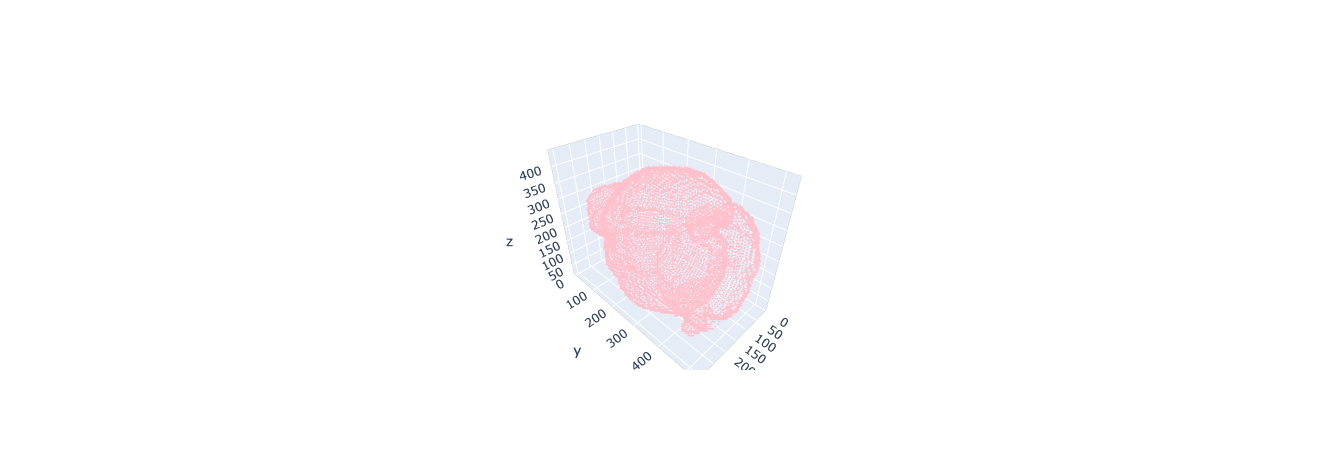

In [9]:
# new=verts.T

# fig = go.Figure(data=[go.Scatter3d(x=new[0], y=new[1], z=new[2],
#                                    mode='markers', marker=dict(size=1, color='pink'))])
# fig.show()

In [18]:
x, y, z = verts.T
i,j,k = faces.T

color=[1,2,3,4,5,6,7]

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.20,
                               i=i,
                               j=j,
                            k=k,)])

fig.add_trace(go.Scatter3d(x=[92,99,88,104,86,237], y=[218,214,210,214],z=[52,47,56,40,47],  mode='markers', marker=dict(size=3, color=color)))
#in fact the y need to add 65 to the outputindex fixed(since we cropped the tempalte during registration)

fig.show()